In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

print("Her şey problemsiz çalışıyor ✅")


Her şey problemsiz çalışıyor ✅


In [2]:
dataFrame =pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


###Veriyi test/train olarak ikiye ayırnmak

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
#train_test_split

In [6]:
dataFrame["Fiyat"]

0       807.673876
1       959.227520
2       718.020033
3       945.668885
4       955.542968
          ...     
995     833.920637
996     800.298076
997     799.261737
998     705.802257
999    1048.892414
Name: Fiyat, Length: 1000, dtype: float64

In [7]:
y= dataFrame["Fiyat"].values
x= dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [8]:
x_train.shape

(670, 2)

In [9]:
x_test.shape

(330, 2)

#scaling


In [10]:
from sklearn.preprocessing import MinMaxScaler


In [11]:
scaler = MinMaxScaler()


In [12]:
scaler.fit(x_train)

MinMaxScaler()

In [13]:
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [14]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [29]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250

21/21 [==============================] - 0s 2ms/step - loss: 795819.8125
Epoch 2/250
21/21 [==============================] - 0s 859us/step - loss: 795648.6875
Epoch 3/250
21/21 [==============================] - 0s 865us/step - loss: 795473.3750
Epoch 4/250
21/21 [==============================] - 0s 822us/step - loss: 795276.8750
Epoch 5/250
21/21 [==============================] - 0s 807us/step - loss: 795052.8750
Epoch 6/250
21/21 [==============================] - 0s 751us/step - loss: 794796.8750
Epoch 7/250
21/21 [==============================] - 0s 751us/step - loss: 794507.1250
Epoch 8/250
21/21 [==============================] - 0s 753us/step - loss: 794181.5625
Epoch 9/250
21/21 [==============================] - 0s 779us/step - loss: 793816.1875
Epoch 10/250
21/21 [==============================] - 0s 804us/step - loss: 793412.1875
Epoch 11/250
21/21 [==============================] - 0s 807us/step - loss: 792965.6250
Epoch 12/250
21/21 [======================

In [31]:
loss= model.history.history["loss"]

<Axes: >

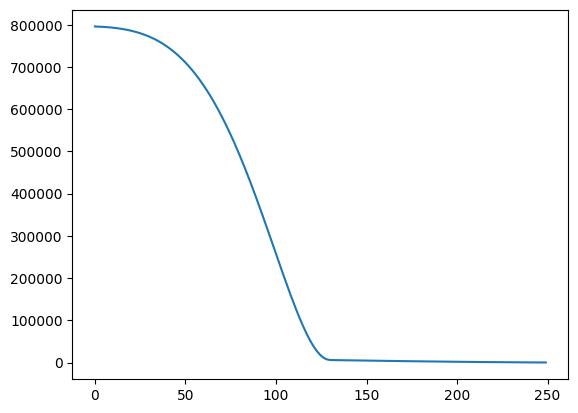

In [32]:
sns.lineplot(x=range(len(loss)),y=loss)

In [37]:
trainLoss =model.evaluate(x_train,y_train,verbose=0)

In [39]:
testLoss=model.evaluate(x_test,y_test,verbose=0)

In [40]:
testLoss

367.6896057128906

In [41]:
trainLoss

376.866943359375

In [45]:
testTahminleri= model.predict(x_test)

11/11 [==============================] - 0s 764us/step


In [48]:
testTahminleri

array([[1058.9939 ],
       [ 649.95013],
       [ 876.5385 ],
       [ 898.81537],
       [ 904.5353 ],
       [ 504.53305],
       [ 928.20624],
       [ 983.45233],
       [ 931.82074],
       [1004.676  ],
       [ 763.83716],
       [ 911.3872 ],
       [ 945.873  ],
       [1037.3378 ],
       [1093.8306 ],
       [ 704.43365],
       [1107.7753 ],
       [ 681.37506],
       [1133.4045 ],
       [ 886.1882 ],
       [ 893.05365],
       [ 730.59467],
       [ 495.96323],
       [ 646.0526 ],
       [ 838.4244 ],
       [1068.92   ],
       [ 733.43243],
       [ 772.4382 ],
       [ 878.47345],
       [ 784.4544 ],
       [ 498.70032],
       [ 791.8428 ],
       [ 745.6851 ],
       [ 674.4062 ],
       [ 888.67267],
       [ 849.7268 ],
       [1020.27704],
       [1013.3676 ],
       [ 848.3414 ],
       [ 867.2607 ],
       [ 770.26117],
       [1149.1204 ],
       [1076.9464 ],
       [1067.3478 ],
       [ 870.0446 ],
       [ 626.3201 ],
       [1126.2156 ],
       [ 968.

In [50]:
tahminDf= pd.DataFrame(y_test,columns=["Gerçek Y"])

In [51]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [56]:
testTahminleri= pd.Series(testTahminleri.reshape(330))

In [58]:
testTahminleri

0      1058.993896
1       649.950134
2       876.538513
3       898.815369
4       904.535278
          ...     
325    1000.112610
326     804.570923
327     776.765564
328    1138.156738
329     817.141174
Length: 330, dtype: float32

In [61]:
tahminDf=pd.concat([tahminDf,testTahminleri],axis=1)

In [62]:
tahminDf

,Gerçek Y,0
0,1081.652164,1058.993896
1,622.675990,649.950134
2,889.356810,876.538513
3,902.826733,898.815369
4,897.662404,904.535278
...,...,...
325,1028.438035,1000.112610
326,789.934950,804.570923
327,758.490486,776.765564
328,1172.871659,1138.156738


In [71]:
tahminDf.columns=["Gerçek Y","Tahmin Y"]

In [72]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1058.993896
1,622.675990,649.950134
2,889.356810,876.538513
3,902.826733,898.815369
4,897.662404,904.535278
...,...,...
325,1028.438035,1000.112610
326,789.934950,804.570923
327,758.490486,776.765564
328,1172.871659,1138.156738


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

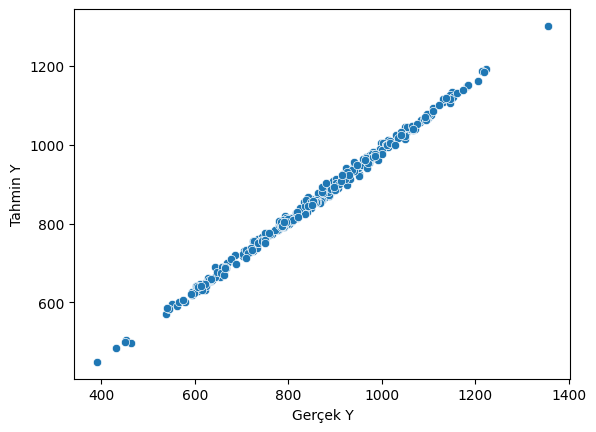

In [73]:
sns.scatterplot(x="Gerçek Y", y="Tahmin Y", data = tahminDf)

In [74]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [75]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

15.553439532568657

In [76]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [77]:
yeniBisiklerOzellikleri = [[1760,1759]]

In [78]:
yeniBisiklerOzellikleri =scaler.transform(yeniBisiklerOzellikleri)

In [79]:
model.predict(yeniBisiklerOzellikleri)

1/1 [==============================] - 0s 19ms/step


array([[1940.9292]], dtype=float32)

In [81]:
from tensorflow.keras.models import load_model

In [82]:
model.save("bisikler_modeli.h5")

C:\Users\baran\tfenv310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
sonradanCagrilanModel= load_model("bisikler_modeli.h5")

In [85]:
sonradanCagrilanModel.predict(yeniBisiklerOzellikleri)

1/1 [==============================] - 0s 46ms/step


array([[1940.9292]], dtype=float32)